In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

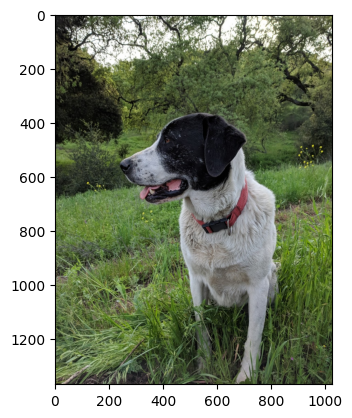

In [3]:
full = cv2.imread(r"C:\Users\umut3\Desktop\Computer-Vision-with-Python\DATA\sammy.jpg")
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)
plt.imshow(full)

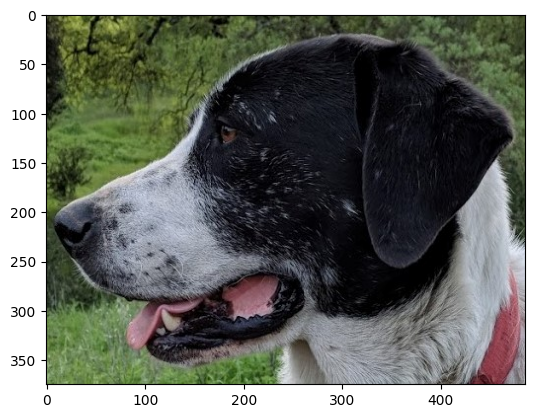

In [4]:
face = cv2.imread(r"C:\Users\umut3\Desktop\Computer-Vision-with-Python\DATA\sammy_face.jpg")
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [5]:
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

(0, 10)


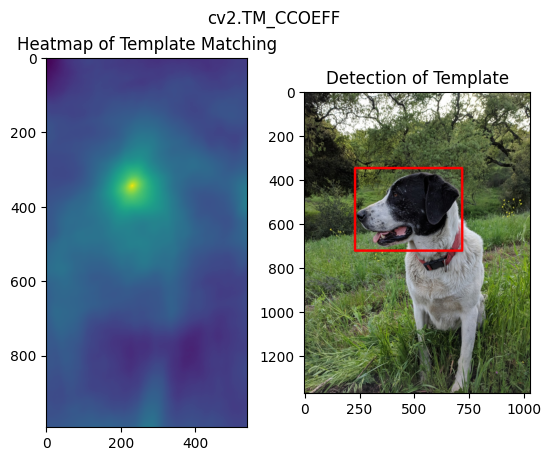





(0, 14)


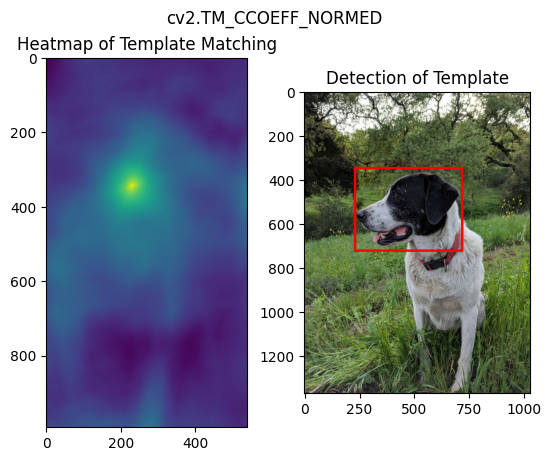





(66, 212)


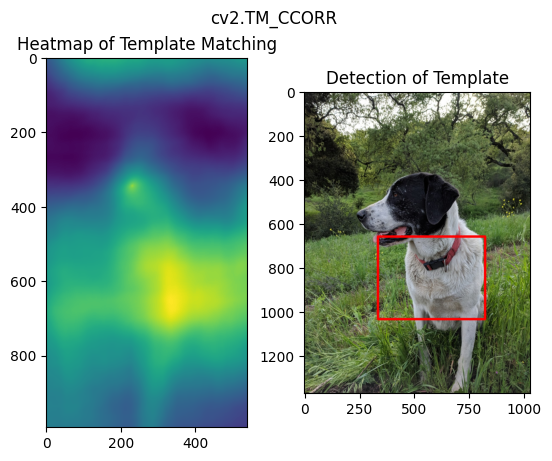





(0, 53)


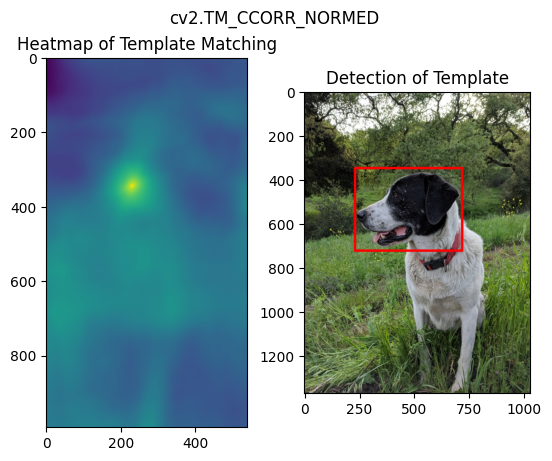





(231, 345)


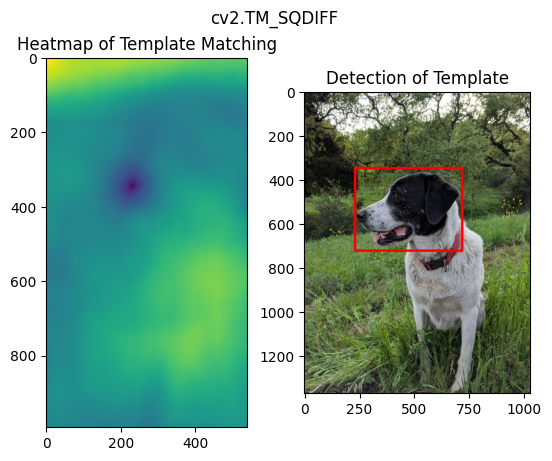





(231, 345)


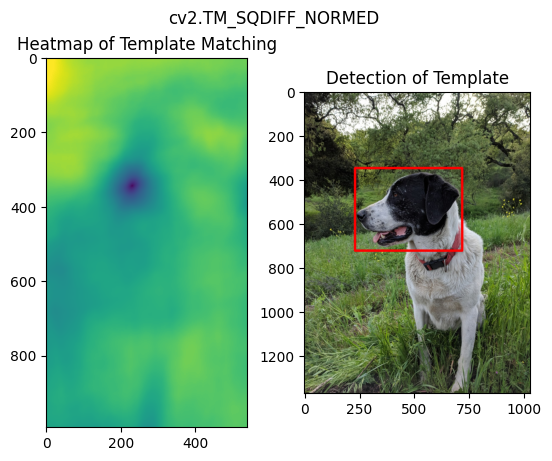

In [7]:
for m in methods:

    # Create a copy
    full_copy = full.copy()

    method = eval(m)

    # Template matching

    res = cv2.matchTemplate(full_copy, face ,method)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    print(min_loc) ####################
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc # (x,y)
    else:
        top_left = max_loc

    height, width, channels = face.shape

    bottom_right = (top_left[0]+width, top_left[1]+height)

    cv2.rectangle(full_copy, top_left, bottom_right, (255, 0, 0), 10)

    # Plot and show images

    plt.subplot(121)
    plt.imshow(res)
    plt.title('Heatmap of Template Matching')

    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detection of Template')
    # Title with the method used
    plt.suptitle(m)

    plt.show()

    print('\n')
    print('\n')